In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('regularization.csv')

In [4]:
df.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,ExterQual_TA,Foundation_PConc,KitchenQual_TA
0,6,1969,1969,663,663,1352,1,7,1,299,158000,1,0,1
1,6,1920,1950,1012,1012,1012,1,6,1,308,118400,1,0,1
2,5,1910,2006,1022,1022,1022,1,4,1,280,85000,1,0,1
3,5,1973,1973,1656,1656,1656,2,8,2,506,135000,1,0,1
4,6,1978,1978,918,918,1683,2,7,2,440,172500,1,0,1


In [5]:
df.isnull().sum()

OverallQual         0
YearBuilt           0
YearRemodAdd        0
TotalBsmtSF         0
1stFlrSF            0
GrLivArea           0
FullBath            0
TotRmsAbvGrd        0
GarageCars          0
GarageArea          0
SalePrice           0
ExterQual_TA        0
Foundation_PConc    0
KitchenQual_TA      0
dtype: int64

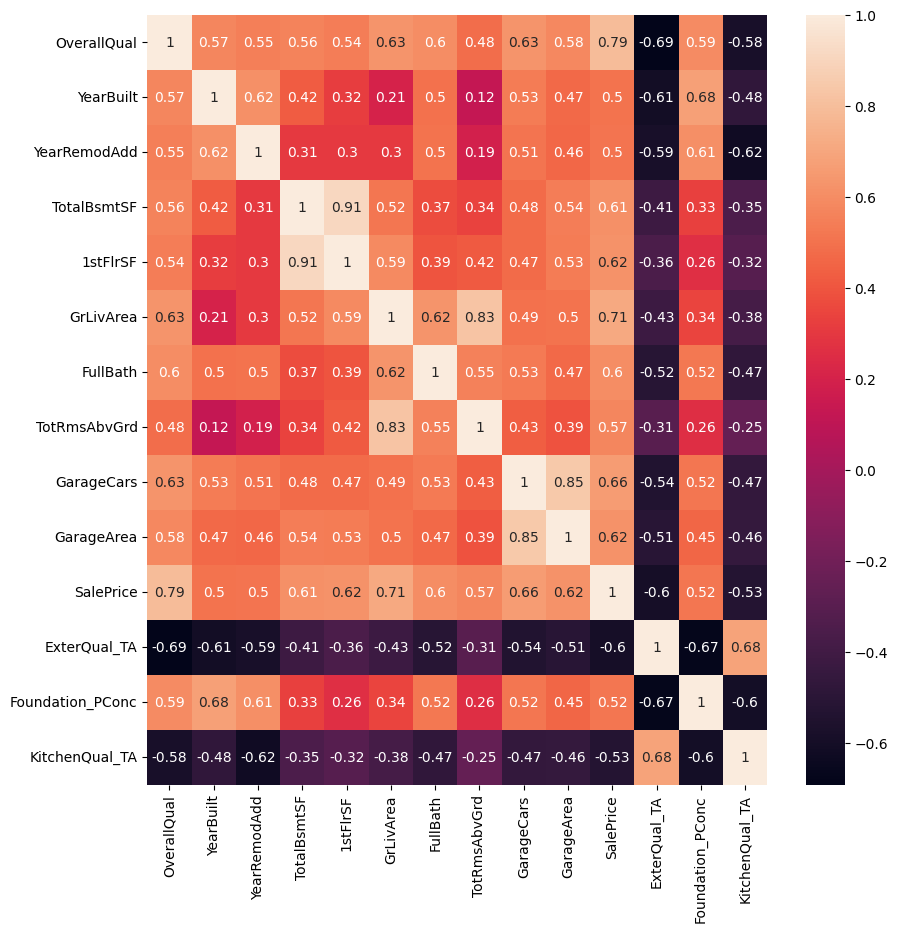

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(data =df.corr() ,annot=True)
plt.show()

In [6]:
x = df.iloc[:,:-1]

In [8]:
y = df['KitchenQual_TA']

In [9]:
sc = StandardScaler()

In [10]:
sc.fit(x)

StandardScaler()

In [13]:
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2 ,random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

# LinearRegression

In [20]:
lr  = LinearRegression()

In [21]:
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
lr.score(x_test,y_test)*100

64.89669424773679

In [60]:
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(mean_squared_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

0.19273122690057815
0.08766454159841544
0.29608198458942997


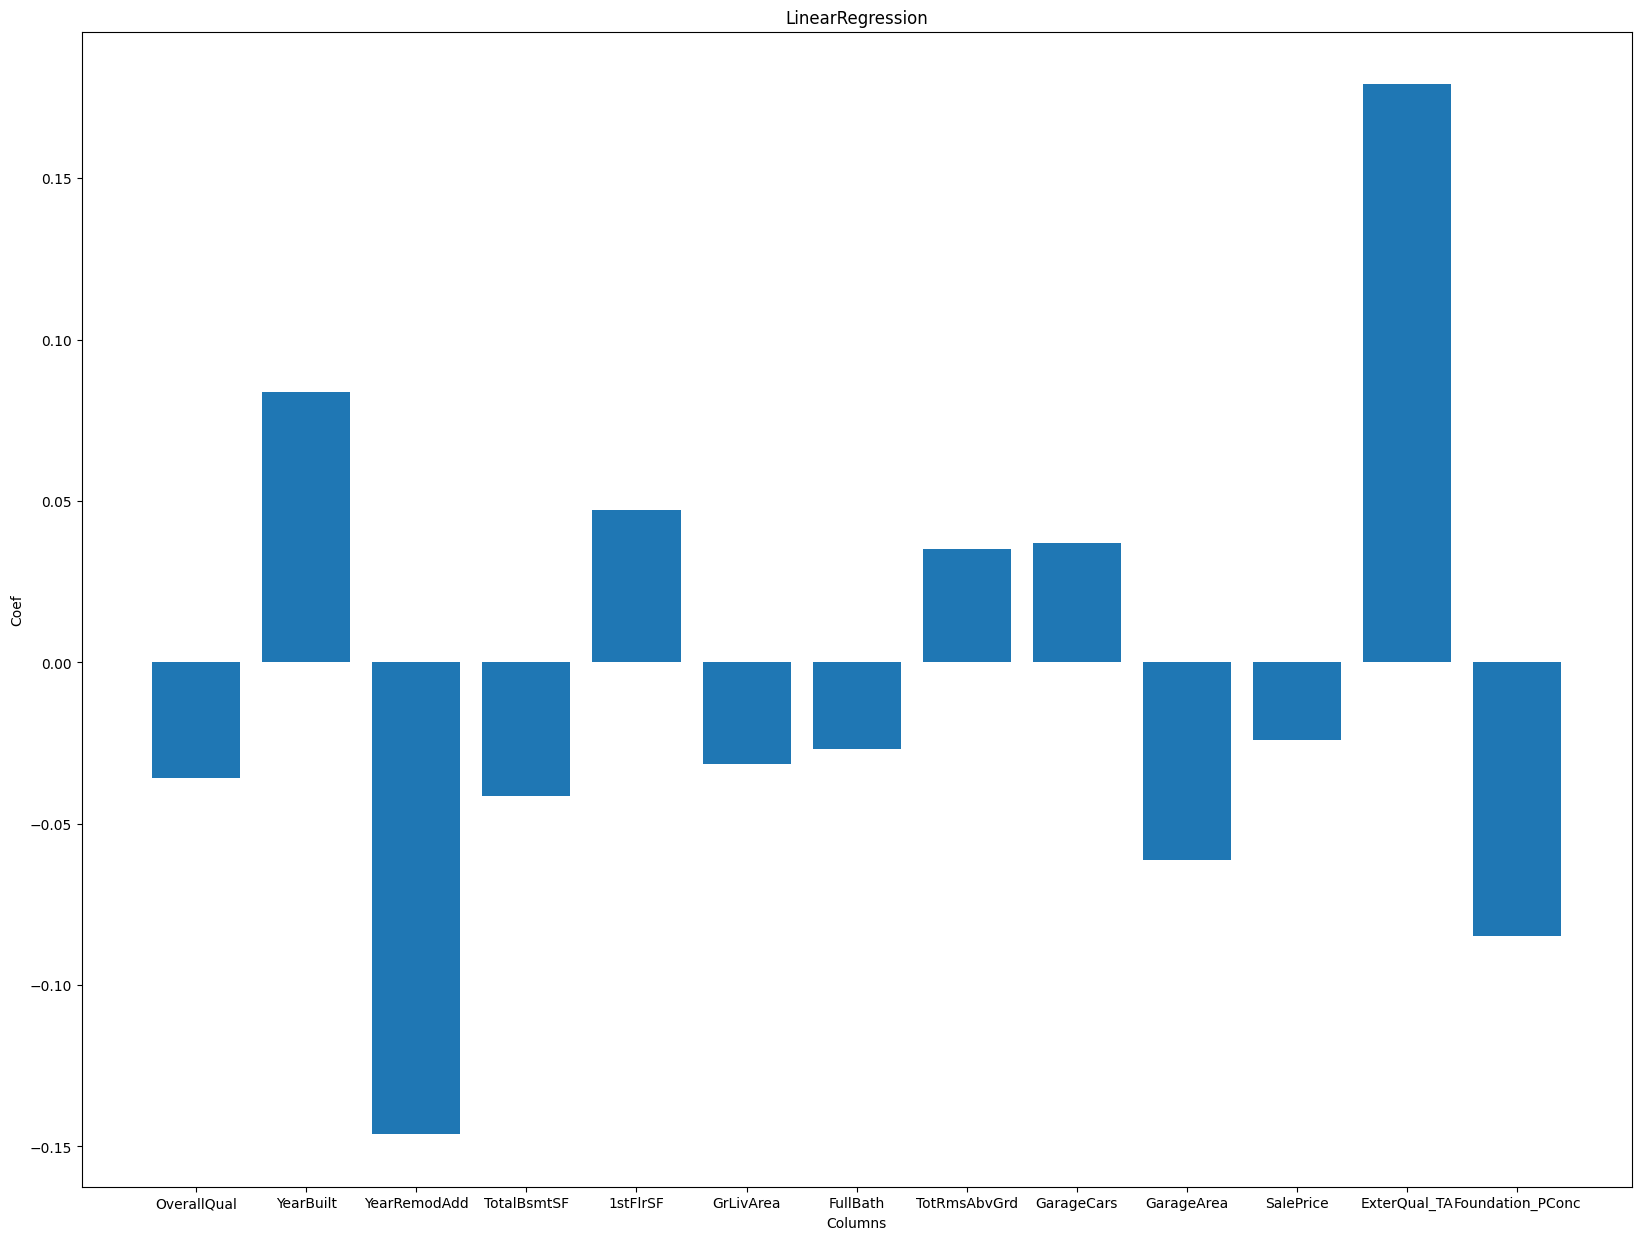

In [26]:
plt.figure(figsize=(20,15))
plt.bar(x.columns,lr.coef_)
plt.title('LinearRegression')
plt.xlabel('Columns')
plt.ylabel('Coef')
plt.show()

# Lasso

In [46]:
la = Lasso(alpha=0.001)
la.fit(x_train,y_train)

Lasso(alpha=0.001)

In [47]:
la.score(x_test,y_test)*100

64.90417294663762

In [48]:
la.coef_

array([-0.03482869,  0.07763597, -0.14376073, -0.02829817,  0.03161499,
       -0.02813463, -0.02410476,  0.03006836,  0.03049152, -0.05520249,
       -0.02161614,  0.17952071, -0.08349946])

In [61]:
print(mean_absolute_error(y_test,la.predict(x_test)))
print(mean_squared_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

0.1930327079828532
0.0876458648186409
0.29605044303064454


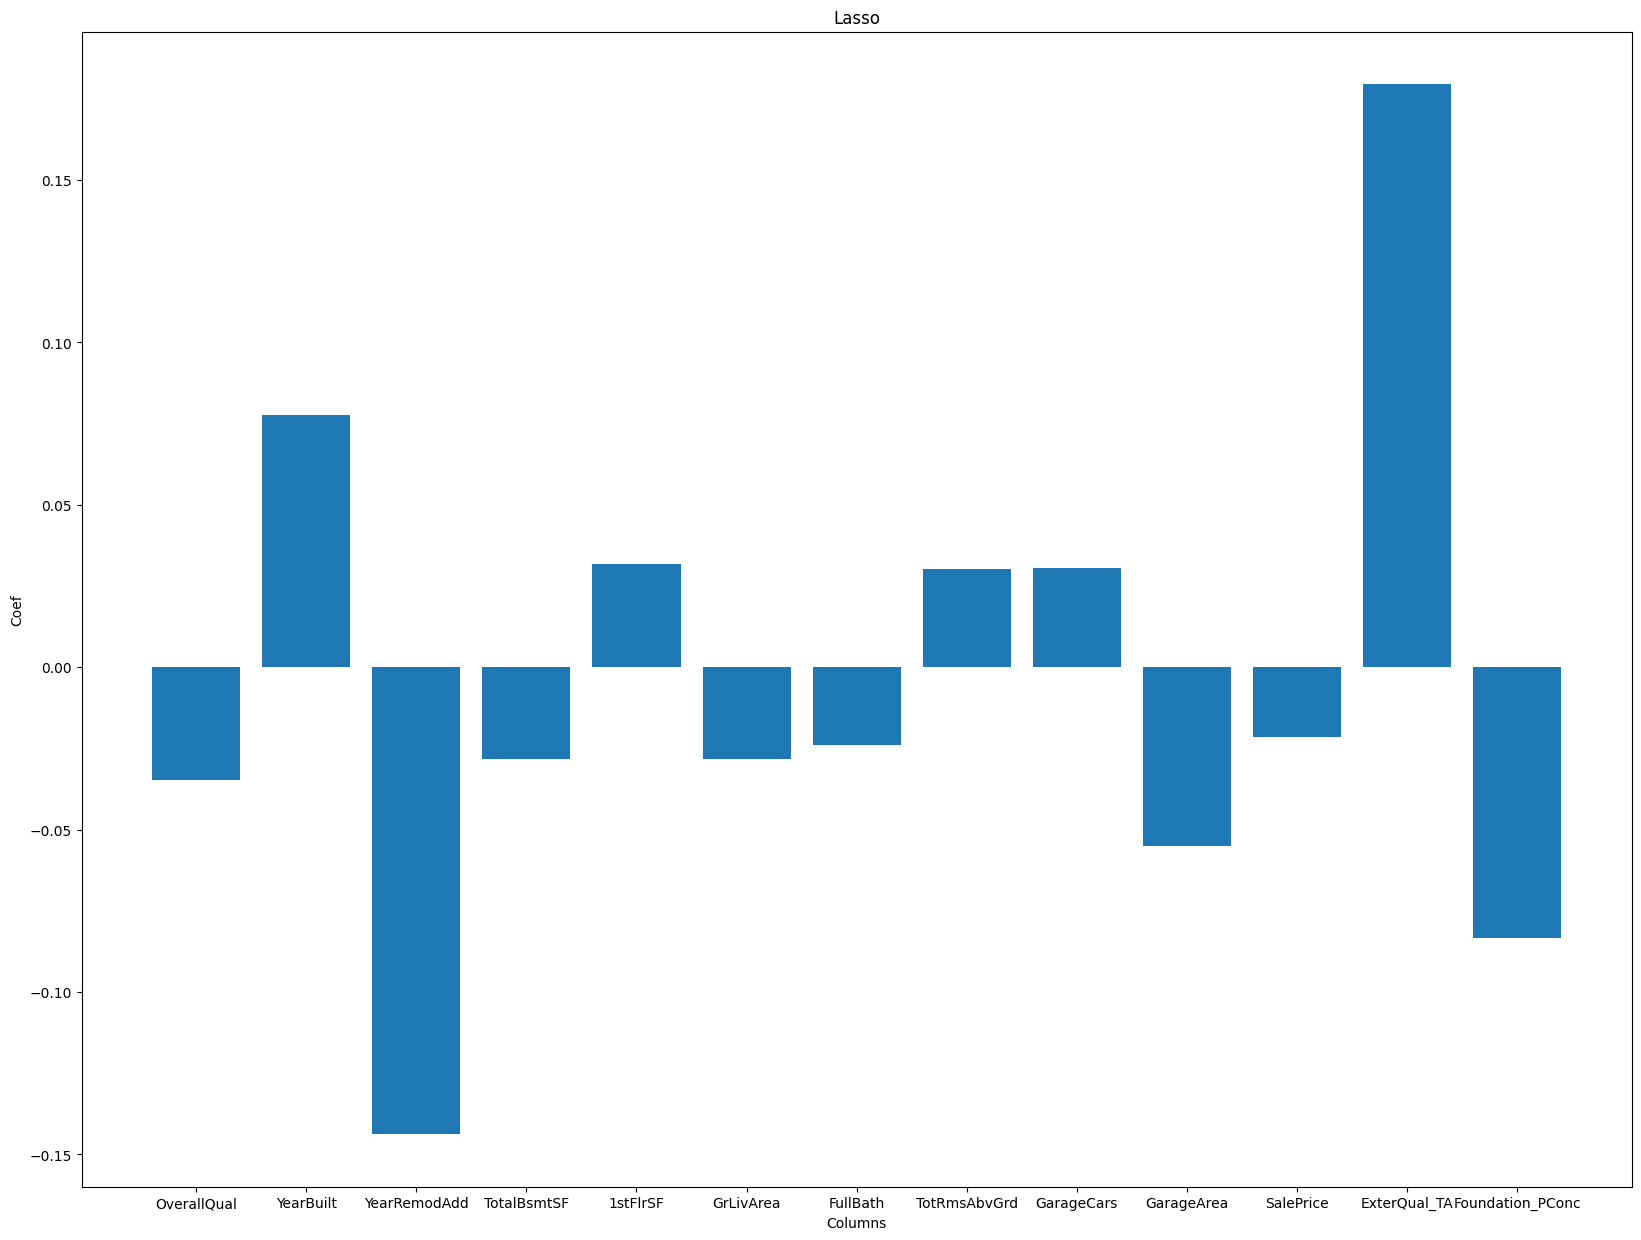

In [49]:
plt.figure(figsize=(20,15))
plt.bar(x.columns,la.coef_)
plt.title('Lasso')
plt.xlabel('Columns')
plt.ylabel('Coef')
plt.show()

# Ridge

In [54]:
ri = Ridge(alpha=0.001)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

64.89669802659603

In [55]:
ri.coef_

array([-0.03585216,  0.08383663, -0.14620027, -0.04129947,  0.04710552,
       -0.03157029, -0.02694949,  0.03504253,  0.03702395, -0.06115848,
       -0.02416781,  0.1791567 , -0.08472832])

In [62]:
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(mean_squared_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

0.19273132984809116
0.08766453216135658
0.2960819686528658


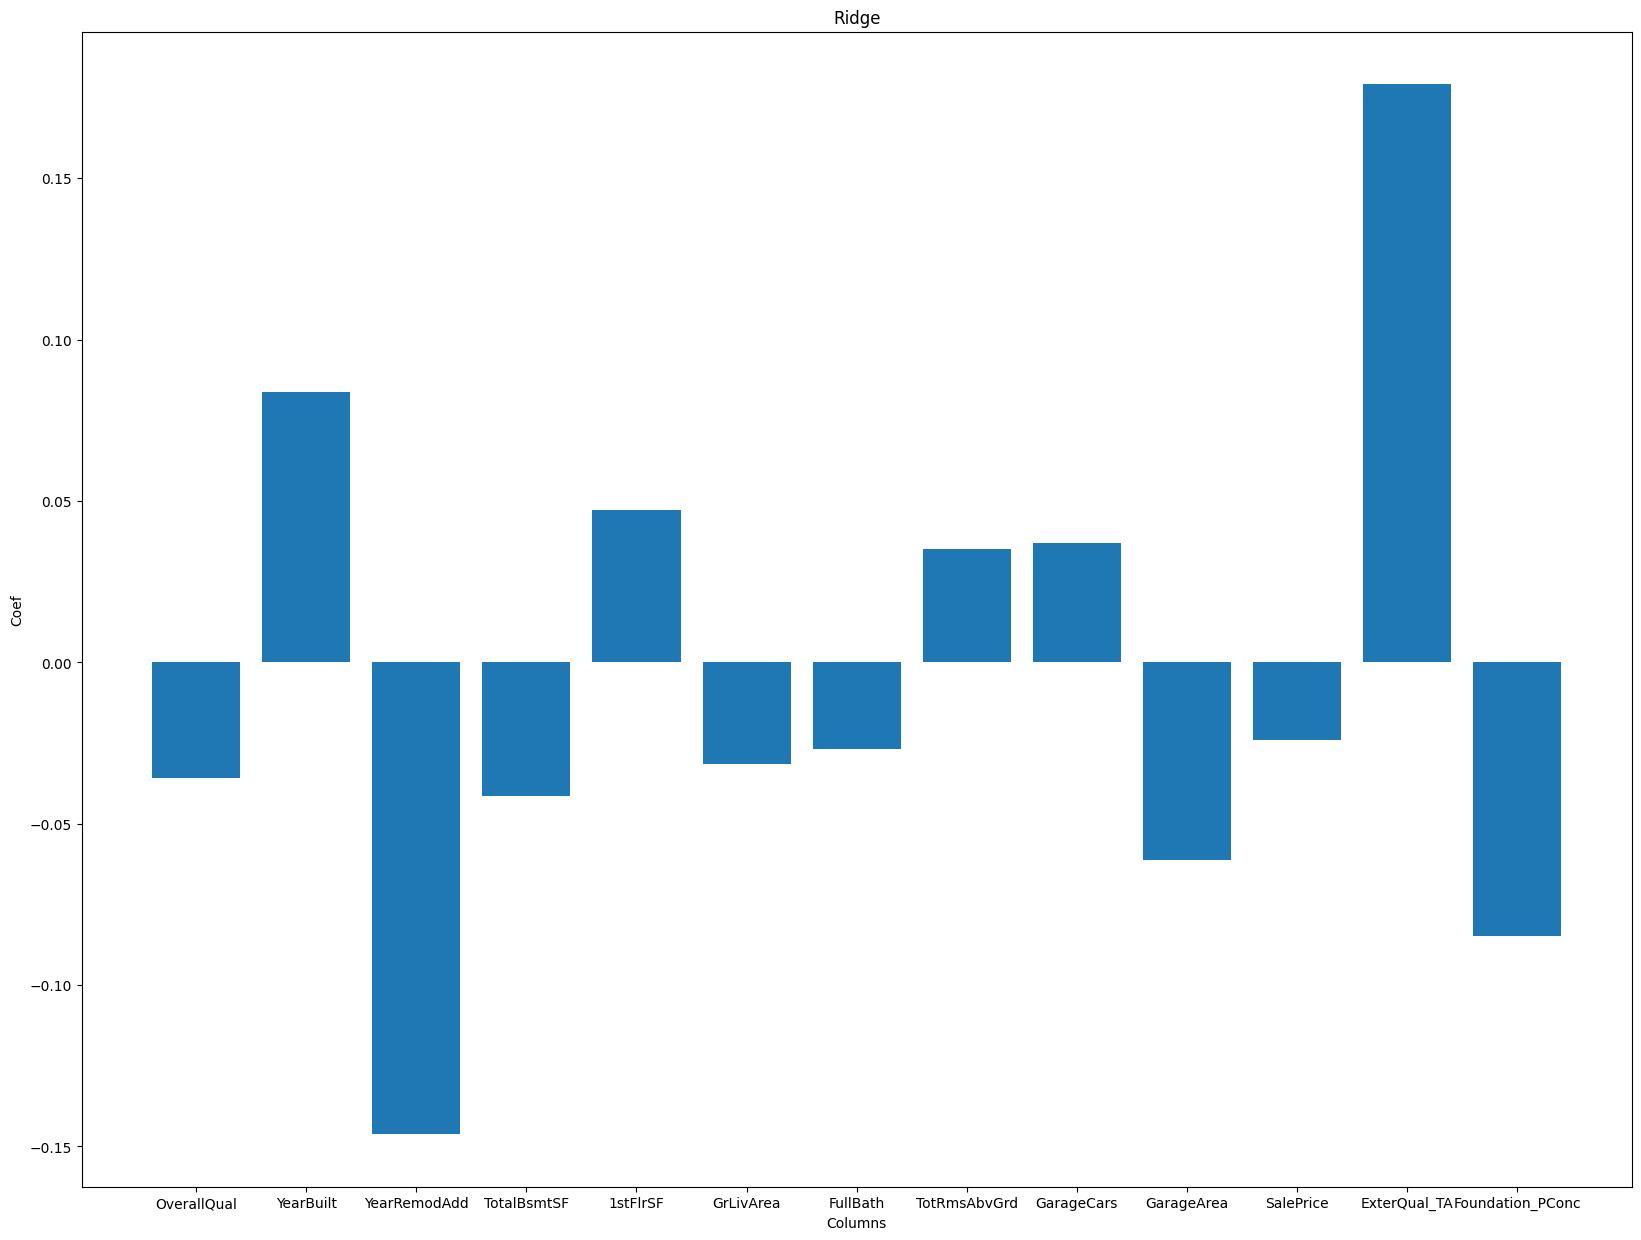

In [56]:
plt.figure(figsize=(20,15))
plt.bar(x.columns,ri.coef_)
plt.title('Ridge')
plt.xlabel('Columns')
plt.ylabel('Coef')
plt.show()

# Comparing

In [63]:
dataset = pd.DataFrame({"col_name ":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})

In [64]:
dataset

,col_name,LinearRegression,Lasso,Ridge
0,OverallQual,-0.035852,-0.034829,-0.035852
1,YearBuilt,0.083837,0.077636,0.083837
2,YearRemodAdd,-0.146201,-0.143761,-0.146200
3,TotalBsmtSF,-0.041301,-0.028298,-0.041299
4,1stFlrSF,0.047107,0.031615,0.047106
5,GrLivArea,-0.031570,-0.028135,-0.031570
6,FullBath,-0.026950,-0.024105,-0.026949
7,TotRmsAbvGrd,0.035043,0.030068,0.035043
8,GarageCars,0.037024,0.030492,0.037024
9,GarageArea,-0.061159,-0.055202,-0.061158
